# Análisis exploratorio de datos

Comentarios iniciales:

df.head() muestra los primeros registros para hacer una inspección de que los datos se hayan cargado correctamente.

df.shape indica las dimensiones del DataFrame (número de filas y columnas).

df.info() ofrece un resumen de los tipos de datos y la presencia de valores nulos.

df.describe() proporciona estadísticas básicas como la media, la desviación estándar y los cuartiles para cada columna numérica.

df.isna().sum() permite ver qué variables tienen valores faltantes y cuántos son.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('cleaned_dataset.csv')

# Visualizar las primeras filas
df.head()


,ID,Tipo de inmueble,Precio (admin_included),Estrato,Baños,Habitaciones,Parqueaderos,Area,Area Privada,Piso,Facilities,Descripción,Antiguedad,Estado
0,10830219.0,Apartaestudio,1800000.0,4.0,1.0,NaN,NaN,22.0,22.0,2.0,"Amoblado, Cocina Integral, Colegios / Universi...","Aparta Estudio en excelente ubicación, con tod...",9 a 15 años,NaN
1,191712314.0,Apartaestudio,3500000.0,4.0,1.0,1.0,NaN,31.0,31.0,0.0,"Alcantarillado, Amoblado, Ascensor, Bahias de ...",Este elegante apartaestudio ofrece una combina...,menor a 1 año,NaN
2,10183666.0,Apartamento,1050000.0,4.0,1.0,1.0,NaN,45.0,45.0,2.0,"Barra estilo americano, Cocina Integral, Cocin...","Apartamentos de 1 alcoba, sala comedor, cocina...",1 a 8 años,NaN
3,10949219.0,Apartamento,3500000.0,4.0,2.0,2.0,1.0,68.2,68.2,14.0,"Ascensor, Balcón, Barra estilo americano, Baño...",Excelente apartamento en el proyecto Avanzza P...,menor a 1 año,NaN
4,192059073.0,Apartamento,1281000.0,4.0,1.0,1.0,1.0,17.0,17.0,0.0,"Acceso Pavimentado, Alcantarillado, Cochera, C...",[ARR] ID HOUM: 148368 Entérate de todos los b...,menor a 1 año,Excelente estado


In [2]:

# Verificar la dimensión del dataset
print("Número de filas y columnas:", df.shape)


Número de filas y columnas: (594, 14)


In [3]:

# Información general de las columnas y tipos de datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       594 non-null    float64
 1   Tipo de inmueble         594 non-null    object 
 2   Precio (admin_included)  594 non-null    float64
 3   Estrato                  591 non-null    float64
 4   Baños                    579 non-null    float64
 5   Habitaciones             550 non-null    float64
 6   Parqueaderos             252 non-null    float64
 7   Area                     594 non-null    float64
 8   Area Privada             481 non-null    float64
 9   Piso                     594 non-null    float64
 10  Facilities               458 non-null    object 
 11  Descripción              594 non-null    object 
 12  Antiguedad               535 non-null    object 
 13  Estado                   53 non-null     object 
dtypes: float64(9), object(5)
m

In [4]:

# Descripción estadística de variables numéricas
print(df.describe())


                 ID  Precio (admin_included)     Estrato       Baños  \
count  5.940000e+02             5.940000e+02  591.000000  579.000000   
mean   1.531369e+08             5.163731e+06    3.871404    2.053541   
std    7.446755e+07             3.692517e+07    0.579636    1.650909   
min    1.894763e+06             5.000000e+04    1.000000    1.000000   
25%    1.911383e+08             1.252500e+06    4.000000    1.000000   
50%    1.917240e+08             1.900000e+06    4.000000    1.000000   
75%    1.919584e+08             3.500000e+06    4.000000    2.000000   
max    1.920591e+08             7.700000e+08    6.000000   12.000000   

       Habitaciones  Parqueaderos        Area  Area Privada        Piso  
count    550.000000    252.000000  594.000000    481.000000  594.000000  
mean       2.432727      1.849206  100.573569     96.525114    1.981481  
std        2.532489      1.643858  138.045010    138.473643    2.542985  
min        1.000000      1.000000    1.000000      1.00

In [5]:

# Contar valores nulos en cada columna
print(df.isna().sum())


ID                           0
Tipo de inmueble             0
Precio (admin_included)      0
Estrato                      3
Baños                       15
Habitaciones                44
Parqueaderos               342
Area                         0
Area Privada               113
Piso                         0
Facilities                 136
Descripción                  0
Antiguedad                  59
Estado                     541
dtype: int64


## 2. Distribución de precios


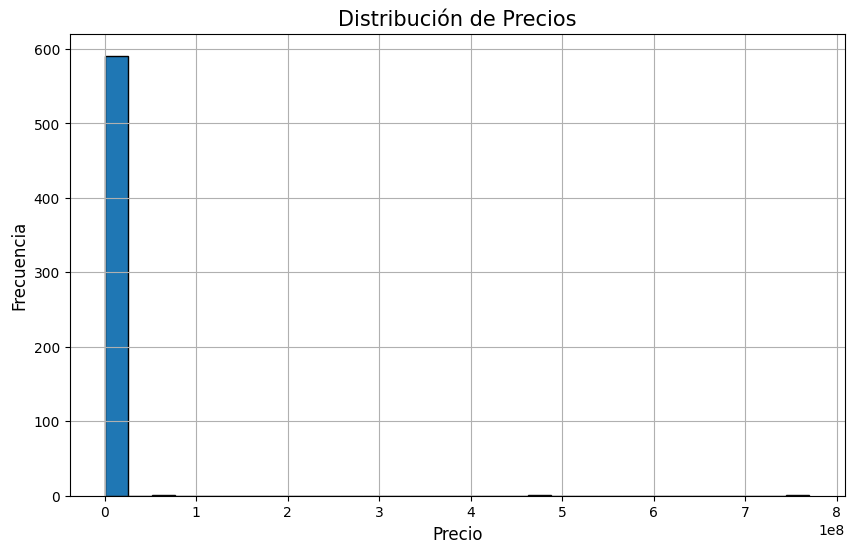

In [6]:
# Histograma de la columna 'precio'
plt.figure(figsize=(10, 6))
plt.hist(df['Precio (admin_included)'], bins=30, edgecolor='black')
plt.title('Distribución de Precios', fontsize=15)
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()




## 3. Distribución del número de habitaciones

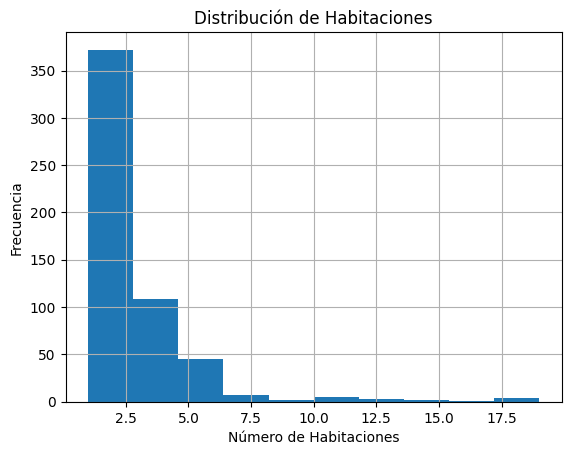

In [7]:
# Histograma de la columna 'habitaciones'
plt.figure()
df['Habitaciones'].hist()
plt.title('Distribución de Habitaciones')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Frecuencia')
plt.show()


## 4. Boxplot para identificar valores atípicos

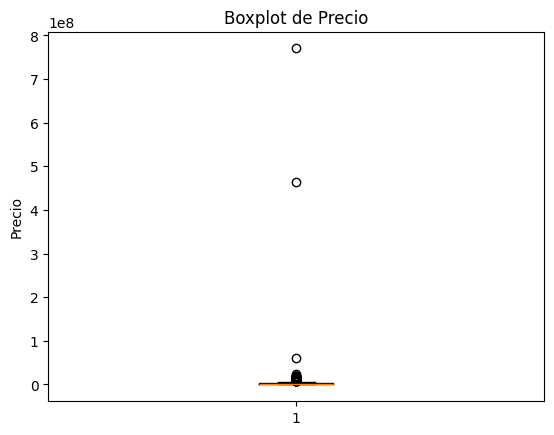

In [8]:
# Boxplot del precio
plt.figure()
plt.boxplot(df['Precio (admin_included)'].dropna())
plt.title('Boxplot de Precio')
plt.ylabel('Precio')
plt.show()


## 5. Relación entre área (m²) y precio

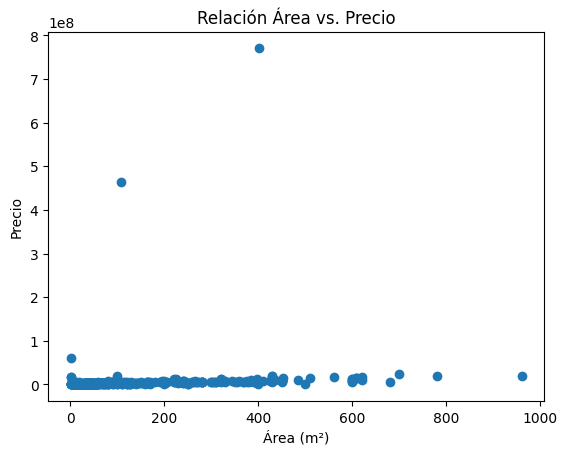

In [9]:
# Scatter plot de area vs precio
plt.figure()
plt.scatter(df['Area'], df['Precio (admin_included)'])
plt.title('Relación Área vs. Precio')
plt.xlabel('Área (m²)')
plt.ylabel('Precio')
plt.show()


## 6. Matriz de correlación entre variables numéricas

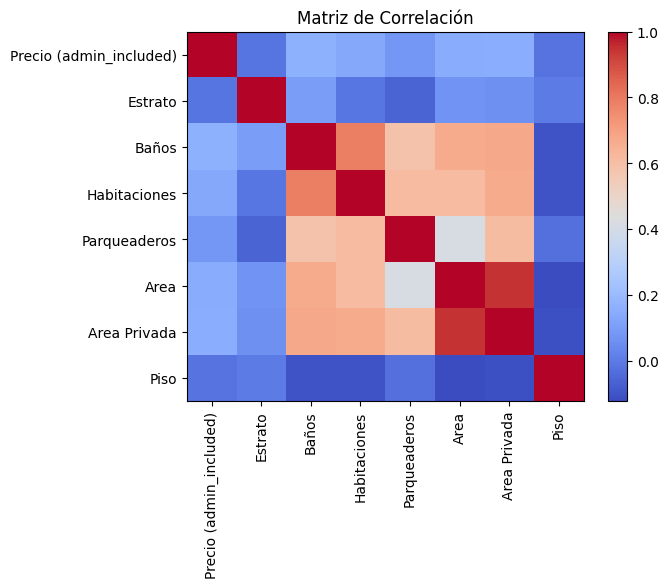

In [10]:
# Crear la matriz de correlación
numeric_columns = ['Precio (admin_included)', 'Estrato', 'Baños', 'Habitaciones','Parqueaderos', 'Area', 'Area Privada', 'Piso']

corr = df[numeric_columns].corr()
# Mostrar la matriz de correlación usando imshow
plt.figure()
plt.imshow(corr, aspect='auto', cmap='coolwarm')
plt.colorbar()
plt.title('Matriz de Correlación')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()